# YOLO v3 Object Detection

Let's see how to use the state of the art in object detection! Please make sure to watch the video, there is no code along here, since we can't reasonably train the YOLOv3 network ourself, instead we will use a pre-established version.

CODE SOURCE: https://github.com/xiaochus/YOLOv3

REFERENCE (for original YOLOv3): 

        @article{YOLOv3,  
              title={YOLOv3: An Incremental Improvement},  
              author={J Redmon, A Farhadi },
              year={2018} 
--------
----------
## YOU MUST WATCH THE VIDEO LECTURE TO PROPERLY SET UP THE MODEL AND WEIGHTS. THIS NOTEBOOK WON'T WORK UNLESS YOU FOLLOW THE EXACT SET UP SHOWN IN THE VIDEO LECTURE.
-------
-------

In [12]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO
import matplotlib.pyplot as plt

In [2]:
def process_image(img):
    """Resize, reduce and expand image.

    # Argument:
        img: original image.

    # Returns
        image: ndarray(64, 64, 3), processed image.
    """
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

In [3]:
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        class_names: List, classes name.

    """
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]

    return class_names

In [4]:
def draw(image, boxes, scores, classes, all_classes):
    """Draw the boxes on the image.

    # Argument:
        image: original image.
        boxes: ndarray, boxes of objects.
        classes: ndarray, classes of objects.
        scores: ndarray, scores of objects.
        all_classes: all classes name.
    """
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 255), 1,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

In [5]:
def detect_image(image, yolo, all_classes):
    """Use yolo v3 to detect images.

    # Argument:
        image: original image.
        yolo: YOLO, yolo model.
        all_classes: all classes name.

    # Returns:
        image: processed image.
    """
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [6]:
def detect_video(video, yolo, all_classes):
    """Use yolo v3 to detect video.

    # Argument:
        video: video file.
        yolo: YOLO, yolo model.
        all_classes: all classes name.
    """
    video_path = os.path.join("videos", "test", video)
    camera = cv2.VideoCapture(video_path)
    cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)

    # Prepare for saving the detected video
    sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    
    vout = cv2.VideoWriter()
    vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)

    while True:
        res, frame = camera.read()

        if not res:
            break

        image = detect_image(frame, yolo, all_classes)
        cv2.imshow("detection", image)

        # Save the video frame by frame
        vout.write(image)

        if cv2.waitKey(110) & 0xff == 27:
                break

    vout.release()
    camera.release()
    

In [7]:
yolo = YOLO(0.6, 0.5)
file = 'data/coco_classes.txt'
all_classes = get_classes(file)

/Users/Felipe/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### Detecting Images

time: 31.90s
class: dog, score: 0.98
box coordinate x,y,w,h: [212.29998292 158.06772584 342.35805044 712.41586804]



True

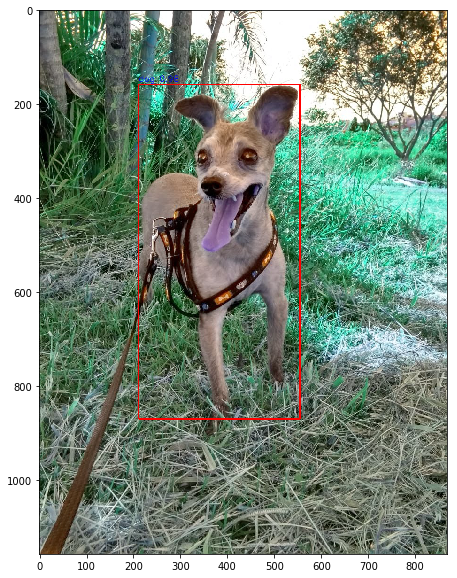

In [23]:
image = cv2.imread('images/test/5.jpg')
image = detect_image(image, yolo, all_classes)
plt.figure(figsize=(20,10))
plt.imshow(image)
cv2.imwrite('images/res/5.jpg', image)

# Detecting on Video

In [9]:
# # detect videos one at a time in videos/test folder    
# video = 'library1.mp4'
# detect_video(video, yolo, all_classes)

time: 3.23s
class: person, score: 0.60
box coordinate x,y,w,h: [2523.36770296 1482.90817547  621.14238739 1302.1294961 ]
class: bicycle, score: 0.84
box coordinate x,y,w,h: [2877.7012825  2007.04590225 1301.56508088  721.28467417]



True